<a href="https://colab.research.google.com/github/ahmedlila/Machine-Learning-Course-Implementations/blob/main/House%20prices%20advanced%20regression%20techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Load Data

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

# Data Exploration

## Missing Data 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

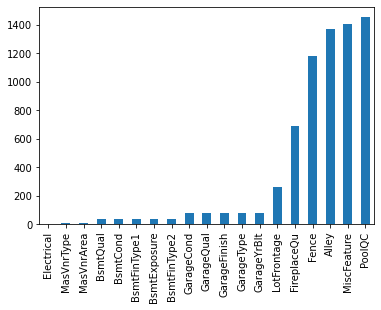

In [ ]:
missing.plot.bar()

# Feature Engineering

In [ ]:
df_train["TotalSqrtFeet"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
df_train['YearBuilt']=df_train['YearBuilt']-df_train['YearBuilt'].min()
df_train['YearRemodAdd']=df_train['YearRemodAdd']-df_train['YearRemodAdd'].min()


df_test["TotalSqrtFeet"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]
df_test['YearBuilt']=df_test['YearBuilt']-df_test['YearBuilt'].min()
df_test['YearRemodAdd']=df_test['YearRemodAdd']-df_test['YearRemodAdd'].min()

Drop out columns that have more than 90% NANs

In [ ]:
#CODE
col_nan = df_train.isna().sum() / df_train.shape[0]
drop_out= col_nan[col_nan.sort_values(ascending=False)>0.9].index
#TEST
drop_out

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')

In [ ]:
"""df_train.drop(drop_out, axis=1, inplace=True)
df_test.drop(drop_out, axis=1, inplace=True)"""

'df_train.drop(drop_out, axis=1, inplace=True)\ndf_test.drop(drop_out, axis=1, inplace=True)'

Drop Useless Columns: Such as **Id, Street, Utilities** *(These column have ame value so they have no effect on our data)*

In [ ]:
Ids=df_test['Id'].copy()
Ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
Ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
useless_cols=["PoolQC","Utilities",'Alley','Street',"Id", 'MiscFeature', 'BsmtFinType2', 'Electrical']
df_train.drop(useless_cols, axis=1, inplace=True)
df_test.drop(useless_cols, axis=1, inplace=True)

Fence: Fence quality.  The field values are defined as 
*   GdPrv	Good Privacy
*   MnPrv	Minimum Privacy
*   GdWo	Good Wood
*   MnWw	Minimum Wood/Wire
*   NA	No Fence

We will use the above technique      

In [ ]:
df_train["Fence"] = df_train["Fence"].astype('category')
df_train["Fence"] = df_train["Fence"].cat.add_categories(['MISSING'])
df_train["Fence"] = df_train["Fence"].fillna('MISSING')

df_test["Fence"] = df_test["Fence"].astype('category')
df_test["Fence"] = df_test["Fence"].cat.add_categories(['MISSING'])
df_test["Fence"] = df_test["Fence"].fillna('MISSING')

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


We will use find and replace


In [ ]:
cleanup_nums = {"FireplaceQu":     {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}}


The last item is the lot frontage (واجهة الشارع).Linear feet of street connected to property.


We may use the median in this case


In [ ]:
df_train['LotFrontage'].fillna(value=df_train['LotFrontage'].median(), inplace=True)
df_test['LotFrontage'].fillna(value=df_train['LotFrontage'].median(), inplace=True)

In [ ]:
df_train['Fireplaces'].isna().sum()

0

In [ ]:
# Similarly, we fix GarageCond using find and replace
cleanup_nums['GarageCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['GarageQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['GarageFinish']= {"Fin": 3, "RFn": 2, "Unf":1, "NA":0}
cleanup_nums['BsmtQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['BsmtCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['BsmtExposure']= {"Gd": 4, "Av": 3, "Mn":2, "No":1, "NA":0}
cleanup_nums['BsmtFinType1']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
cleanup_nums['BsmtFinType2']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}

# for GarageType, NA means no garage
df_train["GarageType"] = df_train["GarageType"].astype('category')
df_train["GarageType"] = df_train["GarageType"].cat.add_categories(['MISSING'])
df_train["GarageType"] = df_train["GarageType"].fillna('MISSING')

df_test["GarageType"] = df_test["GarageType"].astype('category')
df_test["GarageType"] = df_test["GarageType"].cat.add_categories(['MISSING'])
df_test["GarageType"] = df_test["GarageType"].fillna('MISSING')

# for MasVnrType  Masonry veneer type, None means no Maonry veneer
df_train["MasVnrType"] = df_train["MasVnrType"].astype('category')
df_train["MasVnrType"] = df_train["MasVnrType"].cat.add_categories(['MISSING'])
df_train["MasVnrType"] = df_train["MasVnrType"].fillna('MISSING')

df_test["MasVnrType"] = df_test["MasVnrType"].astype('category')
df_test["MasVnrType"] = df_test["MasVnrType"].cat.add_categories(['MISSING'])
df_test["MasVnrType"] = df_test["MasVnrType"].fillna('MISSING')

# for Area, can can use the median
df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].median(), inplace=True)
df_test['MasVnrArea'].fillna(value=df_train['MasVnrArea'].median(), inplace=True)


In [ ]:
# we completed these with large number of missing values, let's replace
df_train = df_train.replace(cleanup_nums)
#fill NAN values as well  
df_train['FireplaceQu'].fillna(value= 0, inplace=True)
df_train['GarageCond'].fillna(value= 0, inplace=True)
df_train['GarageQual'].fillna(value= 0, inplace=True)
df_train['GarageFinish'].fillna(value= 0, inplace=True)
df_train['BsmtQual'].fillna(value= 0, inplace=True)
df_train['BsmtCond'].fillna(value= 0, inplace=True)
df_train['BsmtExposure'].fillna(value= 0, inplace=True)
df_train['BsmtFinType1'].fillna(value= 0, inplace=True)
#df_train['BsmtFinType2'].fillna(value= 0, inplace=True)

df_test = df_test.replace(cleanup_nums)
df_test['FireplaceQu'].fillna(value= 0, inplace=True)
df_test['GarageCond'].fillna(value= 0, inplace=True)
df_test['GarageQual'].fillna(value= 0, inplace=True)
df_test['GarageFinish'].fillna(value= 0, inplace=True)
df_test['BsmtQual'].fillna(value= 0, inplace=True)
df_test['BsmtCond'].fillna(value= 0, inplace=True)
df_test['BsmtExposure'].fillna(value= 0, inplace=True)
df_test['BsmtFinType1'].fillna(value= 0, inplace=True)
#df_test['BsmtFinType2'].fillna(value= 0, inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqrtFeet
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,131,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0.0,Attchd,2003.0,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,MISSING,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,104,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,MISSING,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,129,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,MISSING,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,43,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,MISSING,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,128,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,MISSING,0,12,2008,WD,Normal,250000,3343


Check missing values one more time

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

GarageYrBlt    81
dtype: int64

For the GarageYrBlt I will convert it to categorical to show how old the garage 

In [ ]:
most_recent = df_train['GarageYrBlt'].max()
oldest = df_train['GarageYrBlt'].min()
period = int((most_recent - oldest)/5)
bins = [np.NINF, period, 2*period, 3*period, 4*period, 5*period, np.inf]
df_train['GarageYrBlt']= np.digitize(most_recent- df_train['GarageYrBlt'],bins,right=True)
df_test['GarageYrBlt']= np.digitize(most_recent- df_test['GarageYrBlt'],bins,right=True)
df_train['GarageYrBlt'].min()

1

In [ ]:
df_train['GarageYrBlt'].fillna(value= 7, inplace=True)
df_test['GarageYrBlt'].fillna(value= 7, inplace=True)

We can do similar analysis to transform other features such as HeatingQC, ExterQual, etc. (try it yourself)

# Missing data test



In [ ]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Exterior1st      1
Exterior2nd      1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
KitchenQual      1
GarageCars       1
GarageArea       1
SaleType         1
TotalSqrtFeet    1
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
MSZoning         4
dtype: int64

In [ ]:
df_test['Exterior1st'].fillna(value=df_train['Exterior1st'].value_counts().index[0], inplace=True)
df_test['Exterior2nd'].fillna(value=df_train['Exterior2nd'].value_counts().index[0], inplace=True)
df_test['TotalBsmtSF'].fillna(value=df_train['TotalBsmtSF'].median(), inplace=True)
df_test['KitchenQual'].fillna(value=df_train['KitchenQual'].value_counts().index[0], inplace=True)
df_test['GarageCars'].fillna(value=df_train['GarageCars'].median(), inplace=True)
df_test['GarageArea'].fillna(value=df_train['GarageArea'].median(), inplace=True)
df_test['SaleType'].fillna(value=df_train['SaleType'].value_counts().index[0], inplace=True)
df_test['Functional'].fillna(value=df_train['Functional'].value_counts().index[0], inplace=True)
df_test['MSZoning'].fillna(value=df_train['MSZoning'].value_counts().index[0], inplace=True)

In [ ]:
df_test['BsmtFinSF1'].fillna(value=df_train['BsmtFinSF1'].median(), inplace=True)
df_test['BsmtFinSF2'].fillna(value=df_train['BsmtFinSF2'].median(), inplace=True)
df_test['BsmtUnfSF'].fillna(value=df_train['BsmtUnfSF'].median(), inplace=True)
df_test['BsmtFullBath'].fillna(value=df_train['BsmtFullBath'].median(), inplace=True)
df_test['BsmtHalfBath'].fillna(value=df_train['BsmtHalfBath'].median(), inplace=True)

In [ ]:
df_train['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [ ]:
df_test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
TotalSqrtFeet    1
Length: 73, dtype: int64

In [ ]:
df_test.TotalSqrtFeet=df_test.TotalSqrtFeet.fillna(0)

In [ ]:
correlation_matrix = df_train.corr().round(2)
correlation_matrix['SalePrice'].sort_values()

GarageYrBlt     -0.47
KitchenAbvGr    -0.14
EnclosedPorch   -0.13
OverallCond     -0.08
MSSubClass      -0.08
LowQualFinSF    -0.03
YrSold          -0.03
BsmtHalfBath    -0.02
MiscVal         -0.02
BsmtFinSF2      -0.01
3SsnPorch        0.04
MoSold           0.05
PoolArea         0.09
ScreenPorch      0.11
BedroomAbvGr     0.17
BsmtCond         0.21
BsmtUnfSF        0.21
BsmtFullBath     0.23
LotArea          0.26
GarageCond       0.26
GarageQual       0.27
HalfBath         0.28
BsmtFinType1     0.30
OpenPorchSF      0.32
2ndFlrSF         0.32
WoodDeckSF       0.32
LotFrontage      0.33
BsmtExposure     0.37
BsmtFinSF1       0.39
Fireplaces       0.47
MasVnrArea       0.47
YearRemodAdd     0.51
FireplaceQu      0.52
YearBuilt        0.52
TotRmsAbvGrd     0.53
GarageFinish     0.55
FullBath         0.56
BsmtQual         0.59
1stFlrSF         0.61
TotalBsmtSF      0.61
GarageArea       0.62
GarageCars       0.64
GrLivArea        0.71
TotalSqrtFeet    0.78
OverallQual      0.79
SalePrice 

In [ ]:
# get a list of qulitative features
qualitative = df_train.select_dtypes(exclude= ['int64', 'float64'])
qualitative

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Attchd,Y,MISSING,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Detchd,Y,MISSING,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Attchd,Y,MISSING,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,GasA,TA,Y,TA,Min1,Attchd,Y,MnPrv,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,GasA,Ex,Y,Gd,Typ,Attchd,Y,GdPrv,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Gd,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal


# Encoding

In [ ]:
y_train=df_train['SalePrice']
x_train = df_train.loc[:, df_train.columns != 'SalePrice']
ohe = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, qualitative.columns)],
        remainder="passthrough")
X_train_encoded = preprocessor.fit_transform(x_train)
X_test_encoded = preprocessor.transform(df_test)

In [ ]:
x_train.isna().sum().sort_values()

MSSubClass       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
HeatingQC        0
TotalSqrtFeet    0
Length: 73, dtype: int64

In [ ]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSqrtFeet
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,131,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0.0,Attchd,1,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,MISSING,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,104,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,2,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,MISSING,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,129,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,1,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,MISSING,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,43,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,MISSING,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,128,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,1,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,MISSING,0,12,2008,WD,Normal,3343


# First Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

lin_reg = make_pipeline(RobustScaler(), LinearRegression()) #TODO: why Robust Scaler?

lin_reg.fit(X_train_encoded, y_train)
#lin_reg.intercept_, lin_reg.coef_

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y_predicted = lin_reg.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)
print(mse)
print(r2)

465099197.337536
0.9262541956110653


In [ ]:
y_predicted_test = lin_reg.predict(X_test_encoded)
y_predicted_test

array([114127.25     , 149456.1875   , 182211.828125 , ...,
       176649.921875 , 108512.7890625, 236030.828125 ])

LassoLarsCV

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.kernel_ridge import KernelRidge

lasso_model = LassoLarsCV(cv=10)

lasso_model.fit(X_train_encoded, y_train)

y_predicted_lass = lasso_model.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_predicted_lass)
r2 = r2_score(y_train, y_predicted_lass)
print(mse)
print(r2)

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [2500],
              'max_features': [10],
              'max_depth': [5],
              'learning_rate': [0.005],
              'subsample': [0.5],
             'random_state' : [5],
              'criterion': ['mse']}
                       
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=10)
gb_model.fit(X_train_encoded, y_train)
y_predicted = gb_model.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)
print(mse)
print(r2)

106490205.60606903
0.9831149872609578


XGBOOST

In [ ]:
import xgboost as xgb
           
xgboost_model = xgb.XGBRegressor( 
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000, objective='reg:squarederror')

xgboost_model.fit(X_train_encoded, y_train)

y_predicted = xgboost_model.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)
print(mse)
print(r2)

146320.35867106816
0.9999767995459669


LGBM

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.07, n_estimators=2000,
                              max_bin = 20, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.5,
                              min_data_in_leaf =9, min_sum_hessian_in_leaf = 5)
model_lgb.fit(X_train_encoded, y_train)

y_train_pred_lgb = model_lgb.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_train_pred_lgb)
r2 = r2_score(y_train, y_train_pred_lgb)
print(mse)
print(r2)

29830116.74357888
0.9952701574914253


Ensemble

In [ ]:
y_predicted_gb = gb_model.predict(X_test_encoded) 
y_predicted_lgb = model_lgb.predict(X_test_encoded)
y_predicted_xgb= xgboost_model.predict(X_test_encoded) 
y_predicted_lass = lasso_model.predict(X_test_encoded)

In [ ]:
y_predicted_total = 0.4*y_predicted_gb + 0.2*y_predicted_lgb +  0.3*y_predicted_xgb+0.1*y_predicted_lass
y_predicted_total=pd.Series(y_predicted_total)

Save Model

In [ ]:
df_test["Id"]=Ids
df_test['SalePrice']=y_predicted_total
header = ["Id", "SalePrice"]
df_test.to_csv('output.csv', columns=header, index=False)


*   This Notebook: 0.12241  || Rank: #443
